In [1]:
# !pip install easycolab
# import easycolab as ec
# ec.mount()

In [2]:
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import QuantileTransformer
import re
from tqdm.auto import tqdm
import os

%matplotlib inline

In [3]:
log=False
# log=True
if log==True:
    experiment = Experiment(
      api_key="U4nXlyunaf2RKAIp1UtGkzlSL",
      project_name="calorimetergan",
      workspace="saraaali"
    )


In [4]:
df= pd.read_csv('data_june_aging_factor.zip')
df.head()

,event,x_cal,y_cal,z_cal,cellid,E,E_aged,aging_factor,x,y,z,E_cal,E_aged_cal
0,1435,-7.5,19.5,-176.4995,9096,-0.993643,-0.993657,0.988760,9,18,0,1479.403010,1462.774954
1,363,31.5,-25.5,-176.4995,20665,-0.857911,-0.856358,1.000000,22,3,0,28797.261122,28797.261122
2,1202,-13.5,25.5,-176.4995,7306,-0.981843,-0.981644,1.000000,7,20,0,3854.407004,3854.407004
3,6118,-28.5,25.5,-176.4995,2634,-0.998599,-0.998619,0.985513,2,20,0,481.904421,474.922944
4,3813,-34.5,-19.5,-176.4995,192,-0.999976,-0.999984,0.991531,0,5,0,204.862682,203.127800


In [5]:
# E , E_aged are scaled from E_cal, E_calorimetr to [-1,1] (scaling info is later shown if needed )
# also x,y,z, are the coordinates of a tensor, the orgiginal coordinate of calorimetr is x_cal, y_cal, z_cal

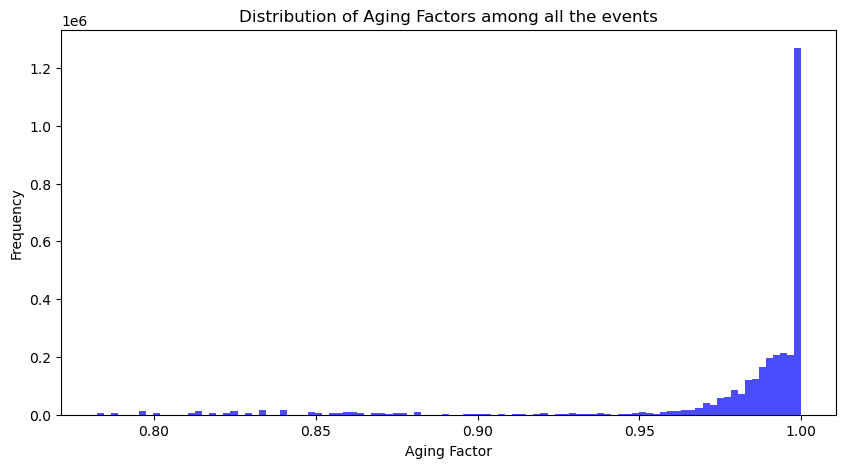

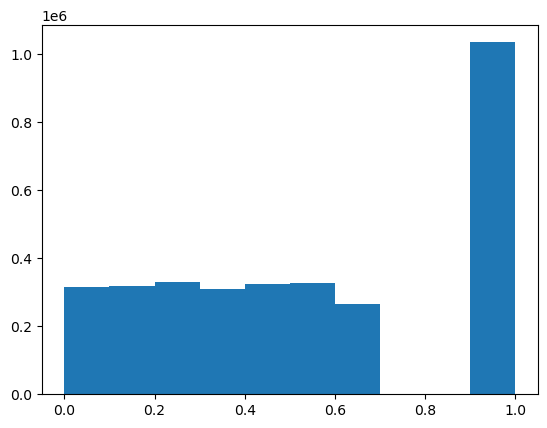

In [5]:


plt.figure(figsize=(10, 5))
plt.hist(df['aging_factor'], bins=100, alpha=0.7, color='blue')
plt.title('Distribution of Aging Factors among all the events')
plt.xlabel('Aging Factor')
plt.ylabel('Frequency')
plt.show()

qt = QuantileTransformer(n_quantiles=1000)
plt.hist(qt.fit_transform(df[['aging_factor']]))
plt.show()


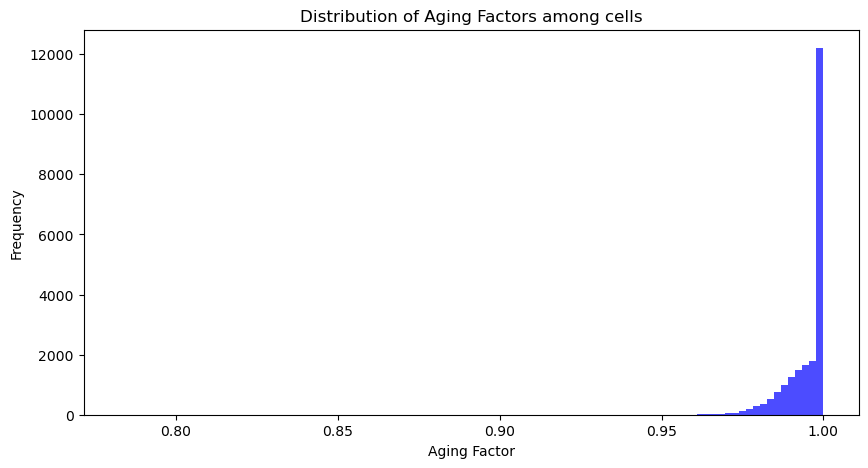

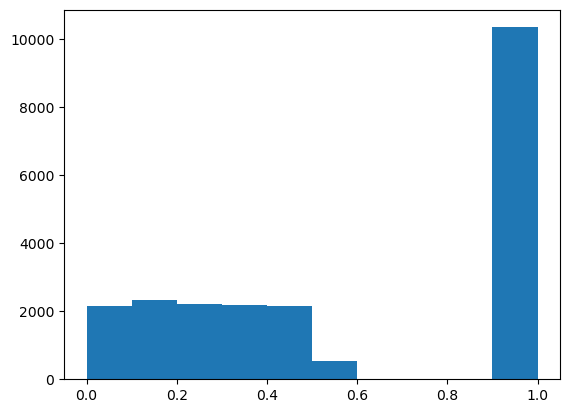

In [6]:
df2= df[['cellid', 'aging_factor', ]].drop_duplicates().sort_values(by='aging_factor')


plt.figure(figsize=(10, 5))
plt.hist(df2['aging_factor'], bins=100, alpha=0.7, color='blue')
plt.title('Distribution of Aging Factors among cells')
plt.xlabel('Aging Factor')
plt.ylabel('Frequency')
plt.show()



qt = QuantileTransformer(n_quantiles=1000)
plt.hist(qt.fit_transform(df2[['aging_factor']]))
plt.show()


In [7]:

# Count the occurrences of each 'cellid'
cellid_counts = df['cellid'].value_counts()

# Identify cellids that occur only once
cellids_to_remove = cellid_counts[cellid_counts ==1].index

# Filter out rows where 'cellid' occurs only once
df_filtered = df[~df['cellid'].isin(cellids_to_remove)]


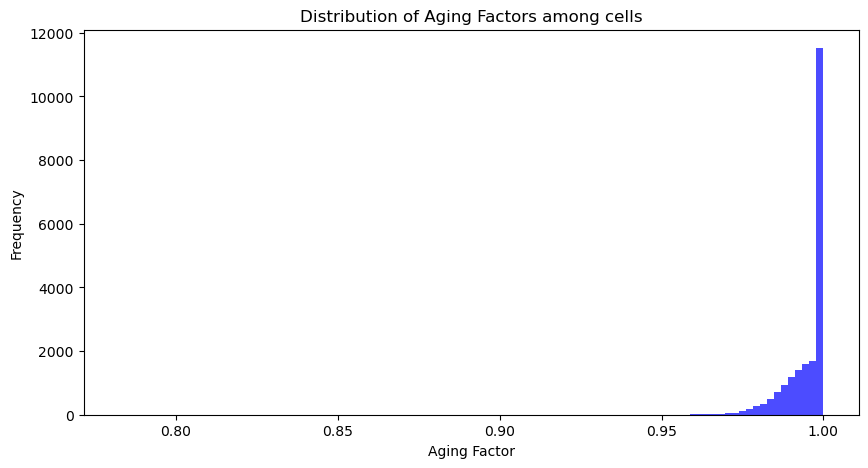

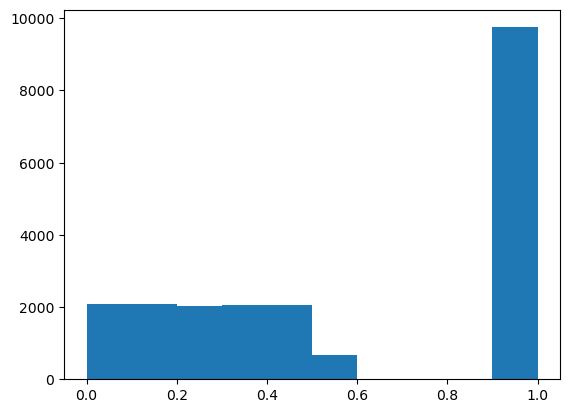

In [8]:
df2= df_filtered[['cellid', 'aging_factor', ]].drop_duplicates().sort_values(by='aging_factor')


plt.figure(figsize=(10, 5))
plt.hist(df2['aging_factor'], bins=100, alpha=0.7, color='blue')
plt.title('Distribution of Aging Factors among cells')
plt.xlabel('Aging Factor')
plt.ylabel('Frequency')
plt.show()



qt = QuantileTransformer(n_quantiles=1000)
plt.hist(qt.fit_transform(df2[['aging_factor']]))
plt.show()


In [9]:
# Filter out rows where 'aging_factor' is 1
df_filtered = df[df['aging_factor'] != 1]


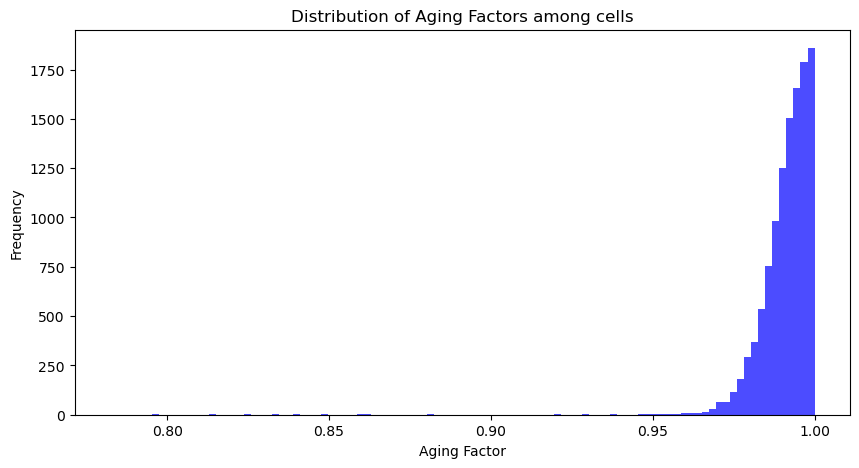

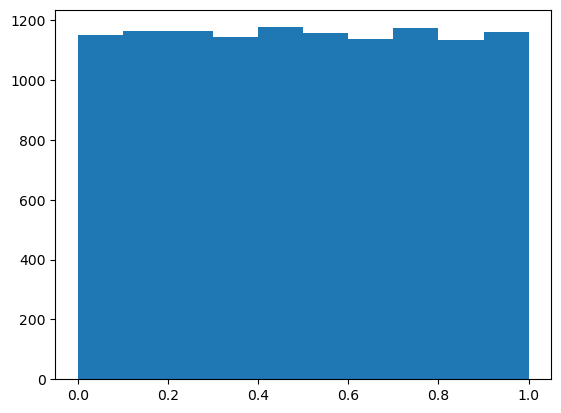

In [10]:
df2= df_filtered[['cellid', 'aging_factor', ]].drop_duplicates().sort_values(by='aging_factor')


plt.figure(figsize=(10, 5))
plt.hist(df2['aging_factor'], bins=100, alpha=0.7, color='blue')
plt.title('Distribution of Aging Factors among cells')
plt.xlabel('Aging Factor')
plt.ylabel('Frequency')
plt.show()



# qt = QuantileTransformer(n_quantiles=1000,output_distribution='normal')
qt = QuantileTransformer(n_quantiles=1000)
plt.hist(qt.fit_transform(df2[['aging_factor']]))
plt.show()


In [11]:
df_filtered['aging_factor_org']= df_filtered['aging_factor']
df_filtered

C:\Users\tharaa\AppData\Local\Temp\ipykernel_15908\3061169355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['aging_factor_org']= df_filtered['aging_factor']


,event,x_cal,y_cal,z_cal,cellid,E,E_aged,aging_factor,x,y,z,E_cal,E_aged_cal,aging_factor_org
0,1435,-7.5,19.5,-176.4995,9096,-0.993643,-0.993657,0.988760,9,18,0,1479.403010,1462.774954,0.988760
3,6118,-28.5,25.5,-176.4995,2634,-0.998599,-0.998619,0.985513,2,20,0,481.904421,474.922944,0.985513
4,3813,-34.5,-19.5,-176.4995,192,-0.999976,-0.999984,0.991531,0,5,0,204.862682,203.127800,0.991531
6,5361,31.5,-34.5,-176.4995,20546,-0.999918,-0.999919,0.998383,22,0,0,216.525880,216.175650,0.998383
9,9316,13.5,-1.5,-176.4995,15368,-0.999720,-0.999732,0.988585,16,11,0,256.295208,253.369630,0.988585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229067,6019,19.5,1.5,18.5395,17314,-0.968198,-0.967919,0.997940,18,12,39,6600.505926,6586.908652,0.997940
3229069,7803,-1.5,31.5,18.5395,11160,-0.995140,-0.995119,0.994612,11,22,39,1178.148239,1171.800895,0.994612
3229070,4990,-19.5,31.5,18.5395,5556,-0.999223,-0.999218,0.998154,5,22,39,356.443178,355.785133,0.998154
3229071,9714,19.5,-7.5,18.5395,17195,-0.997728,-0.997750,0.985859,18,9,39,657.334206,648.039142,0.985859


In [12]:
df_filtered['aging_factor'] = qt.fit_transform(df_filtered[['aging_factor']])


C:\Users\tharaa\AppData\Local\Temp\ipykernel_15908\1876775592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['aging_factor'] = qt.fit_transform(df_filtered[['aging_factor']])


In [14]:
df_filtered

,event,x_cal,y_cal,z_cal,cellid,E,E_aged,aging_factor,x,y,z,E_cal,E_aged_cal,aging_factor_org
0,1435,-7.5,19.5,-176.4995,9096,-0.993643,-0.993657,0.509702,9,18,0,1479.403010,1462.774954,0.988760
3,6118,-28.5,25.5,-176.4995,2634,-0.998599,-0.998619,0.410374,2,20,0,481.904421,474.922944,0.985513
4,3813,-34.5,-19.5,-176.4995,192,-0.999976,-0.999984,0.629616,0,5,0,204.862682,203.127800,0.991531
6,5361,31.5,-34.5,-176.4995,20546,-0.999918,-0.999919,0.927712,22,0,0,216.525880,216.175650,0.998383
9,9316,13.5,-1.5,-176.4995,15368,-0.999720,-0.999732,0.504565,16,11,0,256.295208,253.369630,0.988585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229067,6019,19.5,1.5,18.5395,17314,-0.968198,-0.967919,0.905434,18,12,39,6600.505926,6586.908652,0.997940
3229069,7803,-1.5,31.5,18.5395,11160,-0.995140,-0.995119,0.764082,11,22,39,1178.148239,1171.800895,0.994612
3229070,4990,-19.5,31.5,18.5395,5556,-0.999223,-0.999218,0.915972,5,22,39,356.443178,355.785133,0.998154
3229071,9714,19.5,-7.5,18.5395,17195,-0.997728,-0.997750,0.417901,18,9,39,657.334206,648.039142,0.985859


In [13]:
df_filtered['E_cal_org']= df_filtered['E_cal']
df_filtered['E_cal'] = qt.fit_transform(df_filtered[['E_cal']])
df_filtered

C:\Users\tharaa\AppData\Local\Temp\ipykernel_15908\3101551874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['E_cal_org']= df_filtered['E_cal']
C:\Users\tharaa\AppData\Local\Temp\ipykernel_15908\3101551874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['E_cal'] = qt.fit_transform(df_filtered[['E_cal']])


,event,x_cal,y_cal,z_cal,cellid,E,E_aged,aging_factor,x,y,z,E_cal,E_aged_cal,aging_factor_org,E_cal_org
0,1435,-7.5,19.5,-176.4995,9096,-0.993643,-0.993657,0.509463,9,18,0,0.618329,1462.774954,0.988760,1479.403010
3,6118,-28.5,25.5,-176.4995,2634,-0.998599,-0.998619,0.412641,2,20,0,0.276958,474.922944,0.985513,481.904421
4,3813,-34.5,-19.5,-176.4995,192,-0.999976,-0.999984,0.623725,0,5,0,0.006395,203.127800,0.991531,204.862682
6,5361,31.5,-34.5,-176.4995,20546,-0.999918,-0.999919,0.925757,22,0,0,0.020339,216.175650,0.998383,216.525880
9,9316,13.5,-1.5,-176.4995,15368,-0.999720,-0.999732,0.504021,16,11,0,0.072886,253.369630,0.988585,256.295208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229067,6019,19.5,1.5,18.5395,17314,-0.968198,-0.967919,0.903463,18,12,39,0.900714,6586.908652,0.997940,6600.505926
3229069,7803,-1.5,31.5,18.5395,11160,-0.995140,-0.995119,0.753799,11,22,39,0.557036,1171.800895,0.994612,1178.148239
3229070,4990,-19.5,31.5,18.5395,5556,-0.999223,-0.999218,0.912984,5,22,39,0.178474,355.785133,0.998154,356.443178
3229071,9714,19.5,-7.5,18.5395,17195,-0.997728,-0.997750,0.419174,18,9,39,0.380583,648.039142,0.985859,657.334206


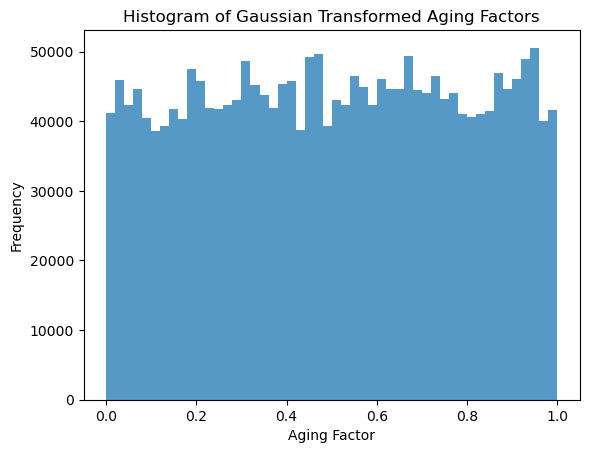

In [14]:

plt.hist(df_filtered['aging_factor'].values, bins=50, alpha=0.75)
plt.title('Histogram of Gaussian Transformed Aging Factors')
plt.xlabel('Aging Factor')
plt.ylabel('Frequency')
plt.show()

In [15]:
df_filtered['E_aged_cal_org'] = df_filtered['E_aged_cal']

C:\Users\tharaa\AppData\Local\Temp\ipykernel_15908\1058031783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['E_aged_cal_org'] = df_filtered['E_aged_cal']


In [16]:
df_filtered['E_aged_cal'] = df_filtered.apply(lambda row: row['E_cal']*row['aging_factor'], axis=1)

C:\Users\tharaa\AppData\Local\Temp\ipykernel_15908\821283779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['E_aged_cal'] = df_filtered.apply(lambda row: row['E_cal']*row['aging_factor'], axis=1)


In [17]:
df_filtered

,event,x_cal,y_cal,z_cal,cellid,E,E_aged,aging_factor,x,y,z,E_cal,E_aged_cal,aging_factor_org,E_cal_org,E_aged_cal_org
0,1435,-7.5,19.5,-176.4995,9096,-0.993643,-0.993657,0.509463,9,18,0,0.618329,0.315016,0.988760,1479.403010,1462.774954
3,6118,-28.5,25.5,-176.4995,2634,-0.998599,-0.998619,0.412641,2,20,0,0.276958,0.114284,0.985513,481.904421,474.922944
4,3813,-34.5,-19.5,-176.4995,192,-0.999976,-0.999984,0.623725,0,5,0,0.006395,0.003989,0.991531,204.862682,203.127800
6,5361,31.5,-34.5,-176.4995,20546,-0.999918,-0.999919,0.925757,22,0,0,0.020339,0.018829,0.998383,216.525880,216.175650
9,9316,13.5,-1.5,-176.4995,15368,-0.999720,-0.999732,0.504021,16,11,0,0.072886,0.036736,0.988585,256.295208,253.369630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229067,6019,19.5,1.5,18.5395,17314,-0.968198,-0.967919,0.903463,18,12,39,0.900714,0.813762,0.997940,6600.505926,6586.908652
3229069,7803,-1.5,31.5,18.5395,11160,-0.995140,-0.995119,0.753799,11,22,39,0.557036,0.419893,0.994612,1178.148239,1171.800895
3229070,4990,-19.5,31.5,18.5395,5556,-0.999223,-0.999218,0.912984,5,22,39,0.178474,0.162943,0.998154,356.443178,355.785133
3229071,9714,19.5,-7.5,18.5395,17195,-0.997728,-0.997750,0.419174,18,9,39,0.380583,0.159531,0.985859,657.334206,648.039142


In [18]:
# the dataset gets dataframe grouped by events
df_events= df_filtered.groupby(df_filtered.event).agg(list).apply(np.array)


In [19]:

for index, evt in df_events.iterrows():
    df_events.at[index,'Esum'] = np.nansum(evt.E_cal)
    df_events.at[index,'Esum_aged'] = np.nansum(evt.E_aged_cal)
    

In [20]:
wasserstein_distance(df_events.Esum, df_events.Esum_aged)

59.057919787473686

In [21]:
wasserstein_distance(df_events.Esum_aged, df_events.Esum_aged)


0.0

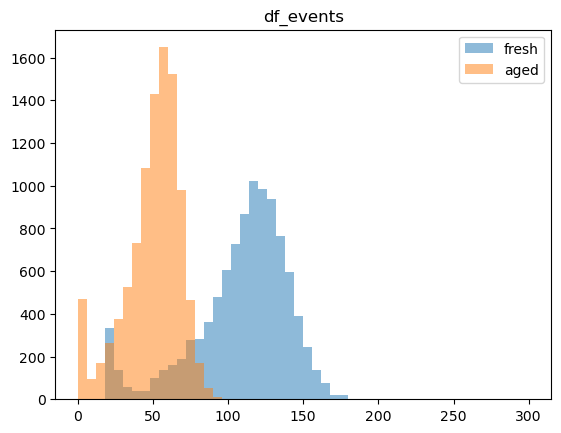

In [22]:
    
bins=50
ran=[0,300]

plt.hist(df_events.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.title('df_events')

plt.legend()

plt.show()



In [23]:
# Assign events to df_events_new and df_events_old based on the split
df_new = df_filtered.copy()
df_old = df_filtered.copy()
# Optionally, check if the split is even
print(f"\nNumber of unique events in df_events_new: {len(df_new['event'].unique())}")
print(f"Number of unique events in df_events_old: {len(df_old['event'].unique())}")



Number of unique events in df_events_new: 10000
Number of unique events in df_events_old: 10000


In [24]:
# the dataset gets dataframe grouped by events
df_new_events = df_filtered.groupby(df_new.event).agg(list).apply(np.array)
df_old_events = df_filtered.groupby(df_old.event).agg(list).apply(np.array)

In [25]:

for index, evt in df_new_events.iterrows():
    df_new_events.at[index,'Esum'] = np.nansum(evt.E_cal)
    df_new_events.at[index,'Esum_aged'] = np.nansum(evt.E_aged_cal)
    
for index, evt in df_old_events.iterrows():
    df_old_events.at[index,'Esum'] = np.nansum(evt.E_cal)
    df_old_events.at[index,'Esum_aged'] = np.nansum(evt.E_aged_cal)
    

In [26]:
wasserstein_distance(df_new_events.Esum, df_old_events.Esum)

0.0

In [27]:
wasserstein_distance(df_new_events.Esum_aged, df_old_events.Esum_aged)


0.0

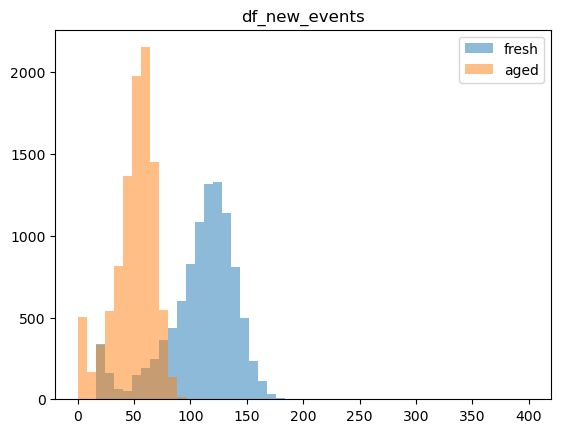

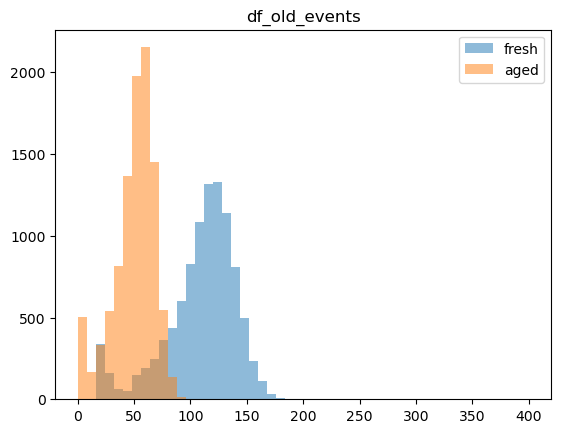

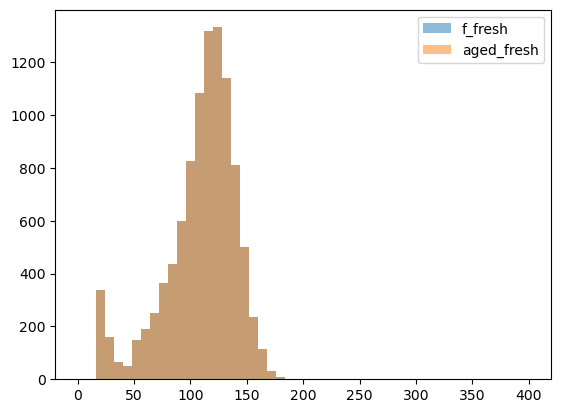

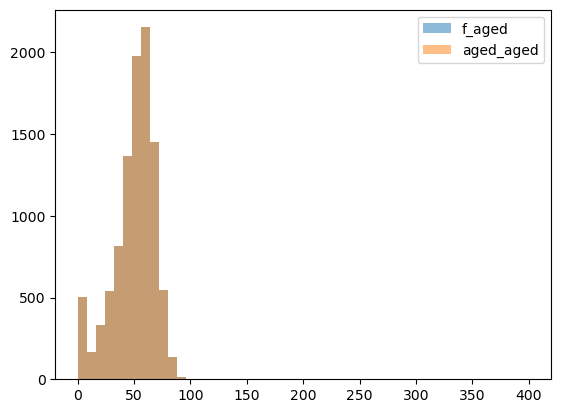

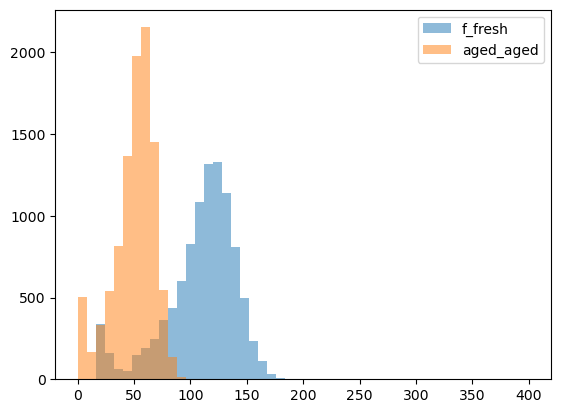

In [28]:
    
bins=50
ran=[0,400]

plt.hist(df_new_events.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_new_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.title('df_new_events')

plt.legend()

plt.show()



plt.hist(df_old_events.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_old_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.title('df_old_events')

plt.legend()

plt.show()


plt.hist(df_new_events.Esum, bins=50, range=ran, alpha=0.5, label='f_fresh')
plt.hist(df_old_events.Esum, bins=50, range=ran, alpha=0.5, label='aged_fresh')


plt.legend()

plt.show()



plt.hist(df_new_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='f_aged')
plt.hist(df_old_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged_aged')


plt.legend()

plt.show()




plt.hist(df_new_events.Esum, bins=50, range=ran, alpha=0.5, label='f_fresh')
plt.hist(df_old_events.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged_aged')


plt.legend()

plt.show()

In [29]:
df= df_filtered
df

,event,x_cal,y_cal,z_cal,cellid,E,E_aged,aging_factor,x,y,z,E_cal,E_aged_cal,aging_factor_org,E_cal_org,E_aged_cal_org
0,1435,-7.5,19.5,-176.4995,9096,-0.993643,-0.993657,0.509463,9,18,0,0.618329,0.315016,0.988760,1479.403010,1462.774954
3,6118,-28.5,25.5,-176.4995,2634,-0.998599,-0.998619,0.412641,2,20,0,0.276958,0.114284,0.985513,481.904421,474.922944
4,3813,-34.5,-19.5,-176.4995,192,-0.999976,-0.999984,0.623725,0,5,0,0.006395,0.003989,0.991531,204.862682,203.127800
6,5361,31.5,-34.5,-176.4995,20546,-0.999918,-0.999919,0.925757,22,0,0,0.020339,0.018829,0.998383,216.525880,216.175650
9,9316,13.5,-1.5,-176.4995,15368,-0.999720,-0.999732,0.504021,16,11,0,0.072886,0.036736,0.988585,256.295208,253.369630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229067,6019,19.5,1.5,18.5395,17314,-0.968198,-0.967919,0.903463,18,12,39,0.900714,0.813762,0.997940,6600.505926,6586.908652
3229069,7803,-1.5,31.5,18.5395,11160,-0.995140,-0.995119,0.753799,11,22,39,0.557036,0.419893,0.994612,1178.148239,1171.800895
3229070,4990,-19.5,31.5,18.5395,5556,-0.999223,-0.999218,0.912984,5,22,39,0.178474,0.162943,0.998154,356.443178,355.785133
3229071,9714,19.5,-7.5,18.5395,17195,-0.997728,-0.997750,0.419174,18,9,39,0.380583,0.159531,0.985859,657.334206,648.039142


In [30]:
def load_or_create_tensors(cellid_coord_file, aging_factors_file, df):
    if os.path.exists(cellid_coord_file) and os.path.exists(aging_factors_file):
        # Load the tensors if both files exist
        cellid_coordinates = torch.load(cellid_coord_file)
        real_aging_factors = torch.load(aging_factors_file)
        print("Loaded tensors from files.")
    else:
        # Create tensors if any file does not exist
        print("Files not found. Creating tensors...")
        cellid_coordinates = torch.zeros(40, 24, 24)  # Tensor for cellid coordinates
        real_aging_factors = torch.ones(40, 24, 24)   # Tensor for real aging factors
        cellidunique = df.cellid.unique()             # Get unique cellid values

        for cellid in cellidunique:
            # Obtain coordinates and aging factor for each unique cellid
            coord = np.unique(df[df.cellid == cellid][['x', 'y', 'z']].values, axis=0)
            aging_fac = df[df.cellid == cellid]['aging_factor'].values[0].item()
            
            if len(coord) != 1:
                print("Error! Each cellid should have unique x, y, z values.")
                print('cellid=', cellid)
            else:
                x, y, z = coord[0]
                if cellid_coordinates[z, x, y] != 0:
                    print('Already filled at', z, x, y, 'was', cellid_coordinates[z, x, y])
                cellid_coordinates[z, x, y] = cellid
                real_aging_factors[z, x, y] = aging_fac

        # Save the newly created tensors
        torch.save(real_aging_factors, aging_factors_file)
        torch.save(cellid_coordinates, cellid_coord_file)
        print("Tensors created and saved.")

    return cellid_coordinates, real_aging_factors

# Example usage:
cellid_coordinates, real_aging_factors = load_or_create_tensors('real_aging_factors_qt.pt', 'cellid_coordinates.pt', df)


Files not found. Creating tensors...
Tensors created and saved.


# Build Custom Dataset

In [33]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data


    def __len__(self):
        return len(self.data)


    def __getitem__(self, idx):
        sample = self.data.iloc[idx]

        ##
        tensor_mask = torch.zeros(40,24,24)
        calorimeterCellsNew = torch.zeros(40,24,24)
        calorimeterCellsOld = torch.zeros(40,24,24)
        tensor_aging_factors = torch.zeros(40,24,24)
#         combined_coordinate = np.array(list(zip(sample['xMapped'], sample['yMapped'],sample['zMapped'])))

        for i,(x,y,z) in enumerate(zip(sample['x'], sample['y'],sample['z'])):
#         for i,(x,y,z) in enumerate(combined_coordinate):
#             print(i, x,y,z)
            tensor_mask[z,x,y]=1
            calorimeterCellsNew[z,x,y]=sample['E_cal'][i]
            calorimeterCellsOld[z,x,y]=sample['E_aged_cal'][i]
            tensor_aging_factors[z,x,y]=sample['aging_factor'][i]


#         print('dataset',tensor_mask)

        return {'calorimeterCellsNew': calorimeterCellsNew,
                'calorimeterCellsOld':calorimeterCellsOld,
                'maskTensor':tensor_mask,
                'CellsCoefficint': tensor_aging_factors,
#                 'combined_coordinate':torch.from_numpy(combined_coordinate)

               }


In [34]:
print("pytorch version:", torch.__version__)
# 
# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if torch.cuda.is_available() else "not available :(")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pytorch version: 1.11.0
GPU available (YESSSS!!!!!)


### Training loop

In [35]:
import torch.nn.init as init
from torch import nn
import torch.nn.functional as F

def weight_init(m):
    '''
    Usage:
        model = Model()
        model.apply(weight_init)
    '''
    if isinstance(m, nn.Conv1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.BatchNorm1d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm2d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm3d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight.data)
        init.normal_(m.bias.data)
    elif isinstance(m, nn.LSTM):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.LSTMCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRU):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRUCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)

class Generator(nn.Module):
    
    def __init__(self, shape, eps=1e-8):
        super().__init__()
        self.W = nn.Parameter(torch.ones(shape, device=device)) # aging factors tensor of shape (E_aged/E_new)
        self.eps = eps
    def forward(self, X, aged=True):
        
        # X - energies tensor (E_aged if aged=True)
        bsize = X.size(0)
        aging_factors = self.W.repeat(bsize,1,1).view(bsize,*self.W.shape)
        if aged:
            E_old = X
            E_new = X/(aging_factors+self.eps)
            return E_new
        else:
            E_new = X
            E_old = X*aging_factors
            return E_old

class Discriminator(nn.Module):
    def __init__(self, in_dim=40, dim=64):
        super().__init__()

        def conv_ln_lrelu(in_dim, out_dim, kernel_size=3, padding=1, stride=1):
            return nn.Sequential(
                nn.Conv2d(in_dim, out_dim, kernel_size, padding=padding, stride=stride),
                nn.InstanceNorm2d(out_dim, affine=True),
                nn.LeakyReLU(0.2))

        self.ls = nn.Sequential(
            nn.Conv2d(in_dim, dim, kernel_size=3, padding=1), nn.LeakyReLU(0.2),
            conv_ln_lrelu(dim, dim*2, kernel_size=3, padding=1),
            conv_ln_lrelu(dim*2, dim * 2),
            conv_ln_lrelu(dim * 2, dim),
            nn.Conv2d(dim, 1, 4), # [B,1,21,21]
            nn.MaxPool2d(21)) # [B,1,1,1]

        self.apply(weight_init)
        # init weights
        # torch.nn.init.kaiming_uniform_()

    def forward(self, x):
        y = self.ls(x)
        y = y.view(-1)
        return y

g = Generator((40,24,24)).to(device)
d = Discriminator().to(device)

In [36]:
# Create the custom dataset and data loader
# let's just use all the data, beacuse we need it all and 
# we are trying to predict aging factors that not even given to model


batch_size =512

dataset_new = CustomDataset(df_new_events)
dataset_old = CustomDataset(df_old_events)


train_loader_new = DataLoader(dataset_new, batch_size=batch_size, shuffle=True,
                          drop_last=False)
train_loader_old = DataLoader(dataset_old, batch_size=batch_size, shuffle=True,
                         drop_last=False)

print(f'len of train loader new:{len(train_loader_new)},len of train set new:{len(dataset_new)} ')
print(f'len of train loader new:{len(train_loader_old)},len of train set new:{len(dataset_old)} ')


len of train loader new:20,len of train set new:10000 
len of train loader new:20,len of train set new:10000 


In [ ]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define your models, optimizers, and other components
g = Generator((40, 24, 24)).to(device)
d = Discriminator().to(device)

d_optimizer = torch.optim.Adam(d.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = torch.optim.Adam(g.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Create a directory to save models
os.makedirs('saved_models', exist_ok=True)

def save_checkpoint(epoch, g, d, g_optimizer, d_optimizer, checkpoint_dir='saved_models'):
    torch.save({
        'epoch': epoch,
        'generator_state_dict': g.state_dict(),
        'discriminator_state_dict': d.state_dict(),
        'g_optimizer_state_dict': g_optimizer.state_dict(),
        'd_optimizer_state_dict': d_optimizer.state_dict()
    }, os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch}.pth'))

def load_checkpoint(g, d, g_optimizer, d_optimizer, checkpoint_path):
    if os.path.isfile(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        g.load_state_dict(checkpoint['generator_state_dict'])
        d.load_state_dict(checkpoint['discriminator_state_dict'])
        g_optimizer.load_state_dict(checkpoint['g_optimizer_state_dict'])
        d_optimizer.load_state_dict(checkpoint['d_optimizer_state_dict'])
        return checkpoint['epoch']
    else:
        return 0

def extract_epoch_number(checkpoint_filename):
    match = re.search(r'checkpoint_epoch_(\d+)\.pth', checkpoint_filename)
    if match:
        return int(match.group(1))
    return -1

# Load checkpoint if it exists
checkpoint_dir = 'saved_models'
checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint_epoch_')]

# Sort checkpoint files by epoch number
checkpoint_files.sort(key=extract_epoch_number)

latest_checkpoint = checkpoint_files[-1] if checkpoint_files else None

start_epoch = 0
if latest_checkpoint:
    checkpoint_path = os.path.join(checkpoint_dir, latest_checkpoint)
    start_epoch = load_checkpoint(g, d, g_optimizer, d_optimizer, checkpoint_path)

print(f"Resuming from epoch {start_epoch}")



d.train()
g.train()
n_epochs = 500


# d_losses_list = []
# g_losses_list = []
# aging_factor_diffs_list = []

save_interval = 5


len_iteration = min(len(train_loader_new) ,len(train_loader_old)) 

step_cnt=0

with tqdm(total=n_epochs*len_iteration, desc=f"[D loss: ?] [G loss: ?]") as pbar:
    for epoch in range(n_epochs):
        train_loader_new = DataLoader(dataset_new, batch_size=batch_size, shuffle=True,
                                  drop_last=False)
        train_loader_old = DataLoader(dataset_old, batch_size=batch_size, shuffle=True,
                                 drop_last=False)
        
        for (caloriData_new, caloriData_old) in zip(train_loader_new, train_loader_old):
            
            
            
            E_new = caloriData_new['calorimeterCellsNew'].to(device) 
            E_old = caloriData_old['calorimeterCellsOld'].to(device) 
            
            if(E_new.size(0)!= E_old.size(0)): #could happen last batch
                # Determine the minimum size between E_new and E_old
                min_size = min(E_new.size(0), E_old.size(0))
                # Resize both tensors to the minimum size
                E_new = E_new.narrow(0, 0, min_size)
                E_old = E_old.narrow(0, 0, min_size)
#                 print('min_size',min_size )
                
        
            # Create masks for non-zero cells
            mask_new = E_new != 0
            mask_old = E_old != 0


            # Combine the masks to only include cells where both are non-zero
            combined_mask = mask_new & mask_old
            
            
            # Apply masks by element-wise multiplication
            E_new = E_new * combined_mask.float()
            E_old = E_old * combined_mask.float()

        
            d_optimizer.zero_grad()
            
            # E_new_fake = g(E_old, aged=True)
            # d_real = d(E_new)
            # d_fake = d(E_new_fake)
            
            
            E_old_fake = g(E_new, aged=False)
            d_real = d(E_old)
            d_fake = d(E_old_fake)
            
            d_loss = -torch.mean(d_real)+torch.mean(d_fake)
            d_loss.backward()
            d_optimizer.step()
            
            g_optimizer.zero_grad()
            
            # E_new_fake = g(E_old, aged=True)
            # d_fake = d(E_new_fake)
            
            E_old_fake = g(E_new, aged=False)
            d_fake = d(E_old_fake)
            
            g_loss = -torch.mean(d_fake)
            
            g_loss.backward()
            g_optimizer.step()
            with torch.no_grad():  # Temporarily disable gradient tracking
                g.W.data.clamp_(0, 1)
            
            
            # Append losses
            # d_losses_list.append(d_loss.item())
            # g_losses_list.append(g_loss.item())
            
            if log==True:
                experiment.log_metric('Disc loss', d_loss.item(), epoch=epoch, step = step_cnt)
                experiment.log_metric('Gen loss', g_loss.item(), epoch=epoch, step = step_cnt)

            step_cnt=step_cnt+1
    
    
            
            pbar.set_description(f"[D loss: {d_loss.item():.2f}] [G loss: {g_loss.item():.2f}]")
            pbar.update(1)
            
            if (step_cnt%20):
                predicted_aging_factors =  g.W.detach().cpu().numpy() 
        
                aging_factor_diff = (real_aging_factors - predicted_aging_factors ).abs().mean().item()

                if log==True:
                    experiment.log_metric('aging_factor_diff',aging_factor_diff, epoch=epoch,step = step_cnt)

#                 print(f'aging_factor_diff: {aging_factor_diff}')
                
                
         # Check if it's time to save the model
        save_checkpoint(epoch, g, d, g_optimizer, d_optimizer)


            
            
        # Evaluate aging factor difference at the end of each epoch
        # clipped beacuse we don't need more than 1 or less thann 0
        predicted_aging_factors =  g.W.detach().cpu().numpy() 
        
        aging_factor_diff = (real_aging_factors - predicted_aging_factors ).abs().mean().item()
        
        if log==True:
            experiment.log_metric('aging_factor_diff',aging_factor_diff, epoch=epoch)
        
        # aging_factor_diffs_list.append(aging_factor_diff)
        print(f'aging_factor_diff: {aging_factor_diff}')
        
        

if log==True:
    experiment.end()

Resuming from epoch 0


[D loss: ?] [G loss: ?]:   0%|          | 0/10000 [00:00<?, ?it/s]

aging_factor_diff: 0.1769734025001526
aging_factor_diff: 0.1766657531261444
aging_factor_diff: 0.17642973363399506
aging_factor_diff: 0.1762865036725998
aging_factor_diff: 0.17619162797927856
aging_factor_diff: 0.17613226175308228
aging_factor_diff: 0.17608729004859924
aging_factor_diff: 0.17606090009212494
aging_factor_diff: 0.1760232001543045
aging_factor_diff: 0.17599941790103912
aging_factor_diff: 0.17598484456539154
aging_factor_diff: 0.17597314715385437
aging_factor_diff: 0.17595358192920685
aging_factor_diff: 0.17593719065189362


In [ ]:


def plot_aging_factor_correlation(epoch, checkpoint_dir, df_old, real_aging_factors, device):
    # Prepare the path for the checkpoint file
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch}.pth')
    
    # Load checkpoint
    if not os.path.isfile(checkpoint_path):
        print("Checkpoint file not found.")
        return

    checkpoint = torch.load(checkpoint_path, map_location=device)
    g.load_state_dict(checkpoint['generator_state_dict'])
    d.load_state_dict(checkpoint['discriminator_state_dict'])
    g_optimizer.load_state_dict(checkpoint['g_optimizer_state_dict'])
    d_optimizer.load_state_dict(checkpoint['d_optimizer_state_dict'])
    
    # Extract predicted aging factors and calculate the mean absolute difference
    predicted_aging_factors = g.W.detach().cpu().numpy() 
    aging_factor_diff = (real_aging_factors - predicted_aging_factors).abs().mean().item()
    
    # Retrieve predicted values based on coordinates and store in a list
    predicted_values = [predicted_aging_factors[z, x, y] for x, y, z in zip(df_old['x'], df_old['y'], df_old['z'])]

    # Prepare results DataFrame
    results_caloGAN_df = df_old.copy()
    results_caloGAN_df['pred_aging_factor'] = predicted_values
    
    # Drop duplicates to minimize memory usage and focus only on unique entries
    unique_aging_factors = results_caloGAN_df[['cellid', 'aging_factor', 'pred_aging_factor']].drop_duplicates()

    true_value = unique_aging_factors.aging_factor.values
    predicted_value = unique_aging_factors.pred_aging_factor.values
    
    # Plot
    plt.figure(figsize=(10, 10))
    plt.scatter(true_value, predicted_value, c='crimson', alpha=0.5)
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    
    print("Mean Absolute Difference in Aging Factors:", aging_factor_diff)

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
g = Generator((40, 24, 24)).to(device)
d = Discriminator().to(device)
g_optimizer = torch.optim.RMSprop(g.parameters(), lr=0.0002, alpha=0.99)
d_optimizer = torch.optim.Adam(d.parameters(), lr=0.0002, betas=(0.5, 0.999))

plot_aging_factor_correlation(50, 'saved_models', df_old, real_aging_factors, device)


In [ ]:

# df is out DataFrame with columns 'x', 'y', 'z'

# Retrieve predicted values based on coordinates and store in a list
predicted_values = [predicted_aging_factors[z, x, y] for x, y, z in zip(df_old['x'], df_old['y'], df_old['z'])]


results_caloGAN_df= df_old.copy()# The results will be in it

results_caloGAN_df['pred_aging_factor'] = predicted_values

results_caloGAN_df['pred_E_aged'] = results_caloGAN_df['E_cal'] * results_caloGAN_df['pred_aging_factor']
results_caloGAN_df['pred_E_new'] = results_caloGAN_df['E_aged_cal'] / results_caloGAN_df['pred_aging_factor']



In [ ]:
df_events_pred = results_caloGAN_df.groupby(results_caloGAN_df.event).agg(list).apply(np.array)

for index, evt in df_events_pred.iterrows():
    df_events_pred.at[index,'Esum'] = np.nansum(evt.E_cal)
    df_events_pred.at[index,'Esum_aged_pred'] = np.nansum(evt.pred_E_aged)
    df_events_pred.at[index,'Esum_new_pred'] = np.nansum(evt.pred_E_new)
    df_events_pred.at[index,'Esum_aged'] = np.nansum(evt.E_aged_cal)

In [ ]:

bins=50
ran=[0,2e6]

plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')

plt.legend()

plt.show()



plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_aged_pred, bins=50, range=ran, alpha=0.5, label='aged_pred')

plt.legend()

plt.show()

 

plt.hist(df_events_pred.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.hist(df_events_pred.Esum_aged_pred, bins=50, range=ran, alpha=0.5, label='aged_pred')


plt.legend()

plt.show()


plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_new_pred, bins=50, range=ran, alpha=0.5, label='fresh_pred')


plt.legend()

plt.show()

In [ ]:
true_value = results_caloGAN_df.aging_factor.values
predicted_value = results_caloGAN_df.pred_aging_factor.values
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson' , alpha=0.5)
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
wasserstein_distance(df_events_pred.Esum_aged_pred, df_events_pred.Esum_aged), wasserstein_distance(df_events_pred.Esum_new_pred, df_events_pred.Esum)


In [ ]:
wasserstein_distance(df_old_events.Esum_aged, df_new_events.Esum_aged), wasserstein_distance(df_old_events.Esum, df_new_events.Esum)


In [ ]:
wasserstein_distance(df_events_pred.Esum_aged_pred, df_events_pred.Esum_aged), wasserstein_distance(df_events_pred.Esum_new_pred, df_events_pred.Esum)


In [ ]:
results_caloGAN_df.to_csv('CaloGAN_diffrent_events_old_fresh_clamp_masked_shuffle_every_epoch50.csv', index=False)  

torch.save(g, 'generator_CaloGAN_diffrent_events_old_fresh_clamp_masked_shuffle_every_epoch50.pth')
torch.save(d, 'discriminator_CaloGAN_diffrent_events_old_fresh_clamp_masked_shuffle_every_epoch50.pth')

torch.save(g.state_dict(), 'generator_state_dict_CaloGAN_diffrent_events_old_fresh_clamp_masked_shuffle_every_epoch50.pth')
torch.save(d.state_dict(), 'discriminator_state_dict_CaloGAN_diffrent_events_old_fresh_clamp_masked_shuffle_every_epoch50.pth')




In [ ]:

# df is out DataFrame with columns 'x', 'y', 'z'

# Retrieve predicted values based on coordinates and store in a list
predicted_values = [predicted_aging_factors[z, x, y] for x, y, z in zip(df_new['x'], df_new['y'], df_new['z'])]


results_caloGAN_df= df_new.copy()# The results will be in it

results_caloGAN_df['pred_aging_factor'] = predicted_values

results_caloGAN_df['pred_E_aged'] = results_caloGAN_df['E_cal'] * results_caloGAN_df['pred_aging_factor']
results_caloGAN_df['pred_E_new'] = results_caloGAN_df['E_aged_cal'] / results_caloGAN_df['pred_aging_factor']



In [ ]:
df_events_pred = results_caloGAN_df.groupby(results_caloGAN_df.event).agg(list).apply(np.array)

for index, evt in df_events_pred.iterrows():
    df_events_pred.at[index,'Esum'] = np.sum(evt.E_cal)
    df_events_pred.at[index,'Esum_aged_pred'] = np.sum(evt.pred_E_aged)
    df_events_pred.at[index,'Esum_new_pred'] = np.sum(evt.pred_E_new)
    df_events_pred.at[index,'Esum_aged'] = np.sum(evt.E_aged_cal)

In [ ]:

bins=50
ran=[0,3e4]

plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')

plt.legend()

plt.show()

bins=50
ran=[0,3e4]

plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_aged_pred, bins=50, range=ran, alpha=0.5, label='aged_pred')

plt.legend()

plt.show()


bins=50
ran=[0,3e4]

plt.hist(df_events_pred.Esum_aged, bins=50, range=ran, alpha=0.5, label='aged')
plt.hist(df_events_pred.Esum_aged_pred, bins=50, range=ran, alpha=0.5, label='aged_pred')


plt.legend()

plt.show()

bins=50
ran=[0,3e4]

plt.hist(df_events_pred.Esum, bins=50, range=ran, alpha=0.5, label='fresh')
plt.hist(df_events_pred.Esum_new_pred, bins=50, range=ran, alpha=0.5, label='fresh_pred')


plt.legend()

plt.show()

In [ ]:
true_value = results_caloGAN_df.aging_factor.values
predicted_value = results_caloGAN_df.pred_aging_factor.values
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson' , alpha=0.5)
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
wasserstein_distance(df_events_pred.Esum_aged_pred, df_events_pred.Esum_aged), wasserstein_distance(df_events_pred.Esum_new_pred, df_events_pred.Esum)


In [ ]:
results_caloGAN_df.to_csv('Only_new_df_setCaloGAN_diffrent_events_old_fresh_clamp_masked_shuffle_every_epoch50.csv', index=False)  